In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

## Task 1: Become familiar with the dataset

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

## Task 3: Load in the Dataset in your Jupyter Notebook

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 4: Generate Descriptive Statistics and Visualizations

__1. For the "Median value of owner-occupied homes" provide a boxplot__



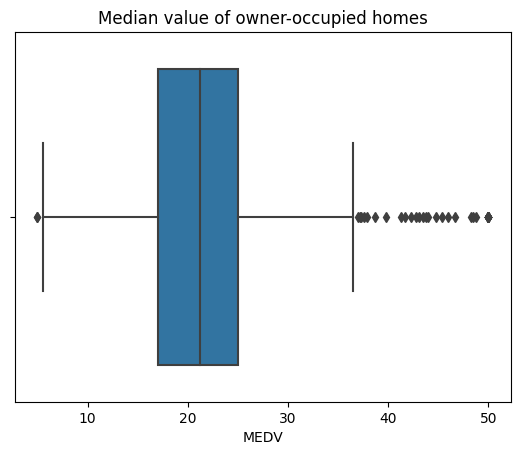

In [7]:
a = sns.boxplot(x='MEDV', data=boston_df)
plt.title("Median value of owner-occupied homes")
plt.show()

__2. Provide a  bar plot for the Charles river variable__

Text(0.5, 1.0, 'Charles River dummy variable ')

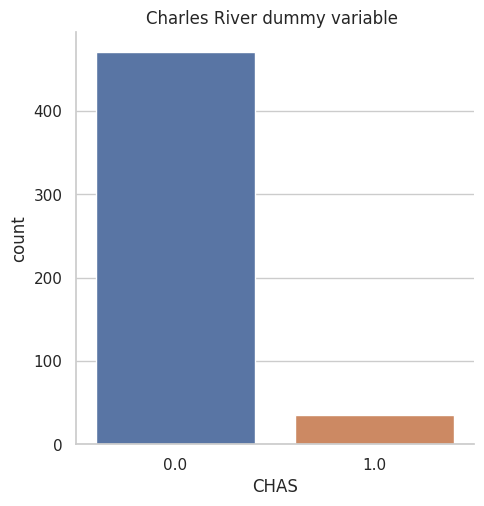

In [12]:
b = sns.catplot(x="CHAS", kind ='count', data=boston_df)
plt.title("Charles River dummy variable ")

__3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older__

In [16]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

Text(0.5, 1.0, ' MEDV variable vs the AGE variable')

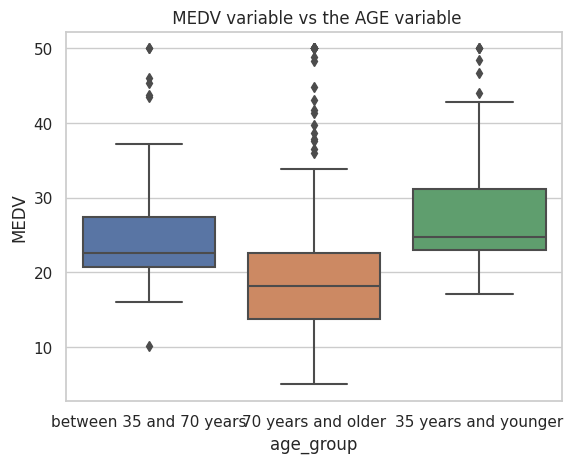

In [20]:
c = sns.boxplot(x = 'age_group', y = 'MEDV', data = boston_df)
c.set_title(' MEDV variable vs the AGE variable')

__4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?__

Text(0.5, 1.0, 'Relationship between Nitric oxide concentrations and the proportion of non-retail business acres')

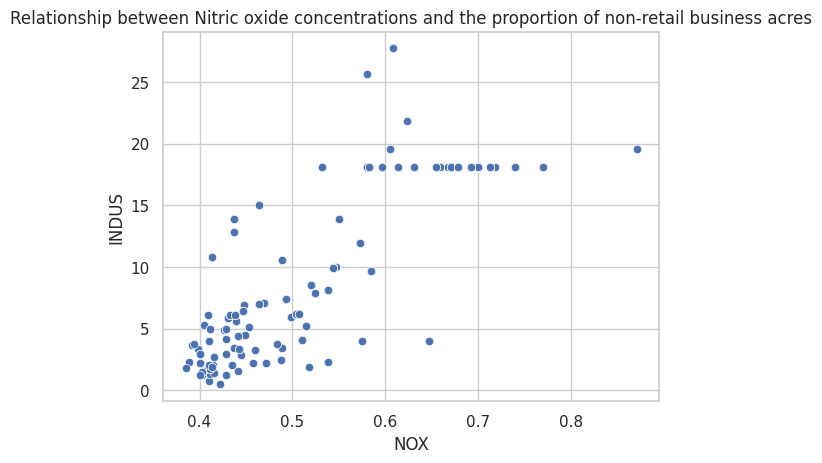

In [21]:
d = sns.scatterplot(x='NOX', y='INDUS',data=boston_df)
plt.title("Relationship between Nitric oxide concentrations and the proportion of non-retail business acres")

Based on the scatterplor, we can see that the concentration of nitric oxides is lower in places with lower proportions of non-retail business. Furthermore, most of the data has these two characteristics.


__5. Create a histogram for the pupil to teacher ratio variable__

Text(0.5, 1.0, 'Histogram for the pupil to teacher ratio variable')

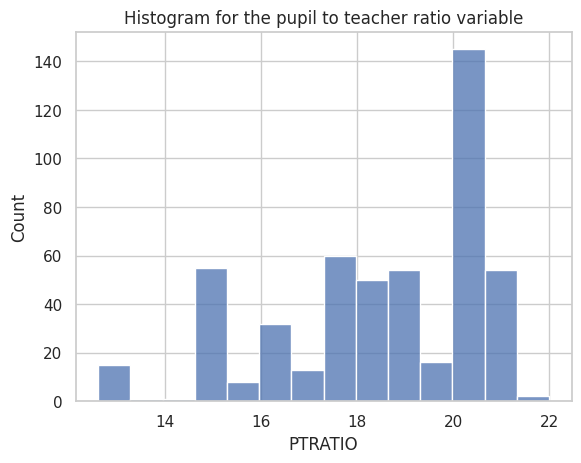

In [26]:
e = sns.histplot(boston_df['PTRATIO'], kde = False)
plt.title("Histogram for the pupil to teacher ratio variable")

## Task 5: Use the appropriate tests to answer the questions provided.


__1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)__


H0 (Null Hypothesis) --- Equal Variances

Ha(Alternative Hypothesis) --- Unequal Variances

In [31]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the p-value (0.03) is less than the significance level (0.05), we can reject the null hypothesis and conclude that the variances are not equal.

H0 (Null Hypothesis) --- There is no difference in median value of houses bounded by the Charles river

Ha(Alternative Hypothesis) --- There's a significant difference in median value of houses bounded bounded by the Charles River

In [32]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

__Since the p-value (0.03) is less than the significance level (0.05), we can reject the null hypothesis and conclude that there is a significant difference in median value of houses bounded bounded by the Charles River__

__2.Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)__


*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

In [35]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'],
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [37]:
tf_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
tf_st = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
st_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [38]:
f_statistic, p_value = scipy.stats.f_oneway(tf_lower, tf_st, st_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


__Since the p-value (0) is less than the significance level (0.05), we can reject the null hypothesis and conclude that at least one of the means differ__

__3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)__


*   $H\_0:$ Nitric oxide concentrations are not correlated with proportion of non-retail business
*   $H\_1:$ Nitric oxide concentrations are correlated with proportions of non-retail business


In [42]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

__Since the p-value (0) is less than the significance level (0.05), we can reject the null hypothesis and conclude that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town__

__4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)__

In [44]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           1.21e-08
Time:                        15:08:55   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see in the model, the impact of an additional DIS on the median value of owner occupied homes is 1.0916
